<a href="https://colab.research.google.com/github/Wikanes-k/multivariate/blob/main/Chapter_4_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multidimensional Scaling

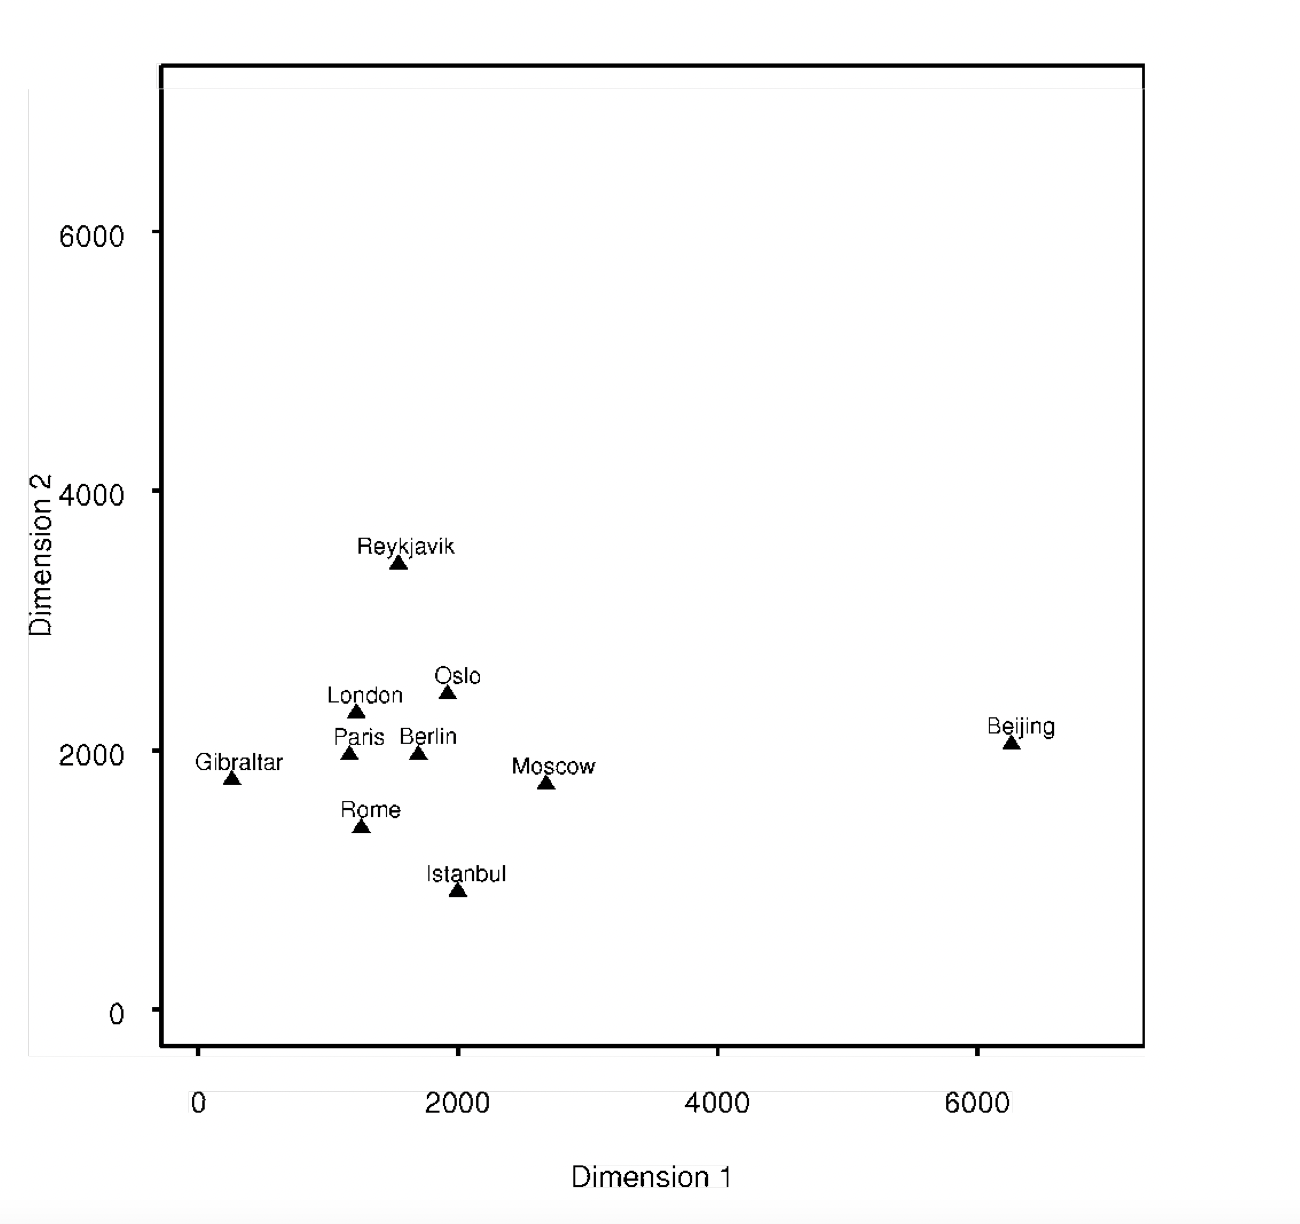

##Example on Iris dataset

In [45]:
import pandas as pd #เรียกใช้ import

In [24]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


###ลอง plot PCA เพื่อเปรียบเทียบกับ วิธี MDS

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=2)

In [46]:
new_pca = pca.fit_transform(example_df.iloc[:,:-1]) #เอาทุกแถวยกเว้น column สุดท้าย

In [28]:
from matplotlib import pyplot as plt

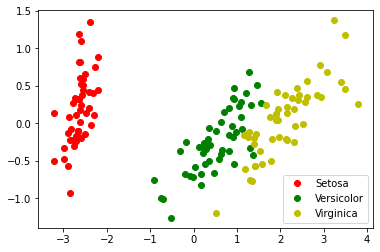

In [29]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or',label='Setosa')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og',label='Versicolor')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy',label='Virginica')
plt.legend()

###MDS (Multidimensional Scaling)

####Distance

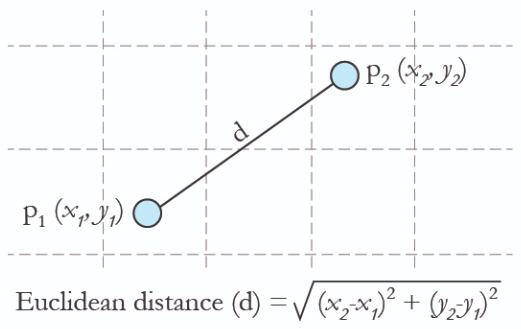

In [30]:
X1 = example_df.iloc[0,:-1].to_numpy()
X1

array([5.1, 3.5, 1.4, 0.2], dtype=object)

In [31]:
X2 = example_df.iloc[1,:-1].to_numpy()
X2

array([4.9, 3.0, 1.4, 0.2], dtype=object)

In [32]:
import numpy as np

In [47]:
dist = np.linalg.norm(X1-X2)   #พาคำนวณค่าตามสูตรในโปรแกรม
dist

0.5385164807134502

###Distance Matrix

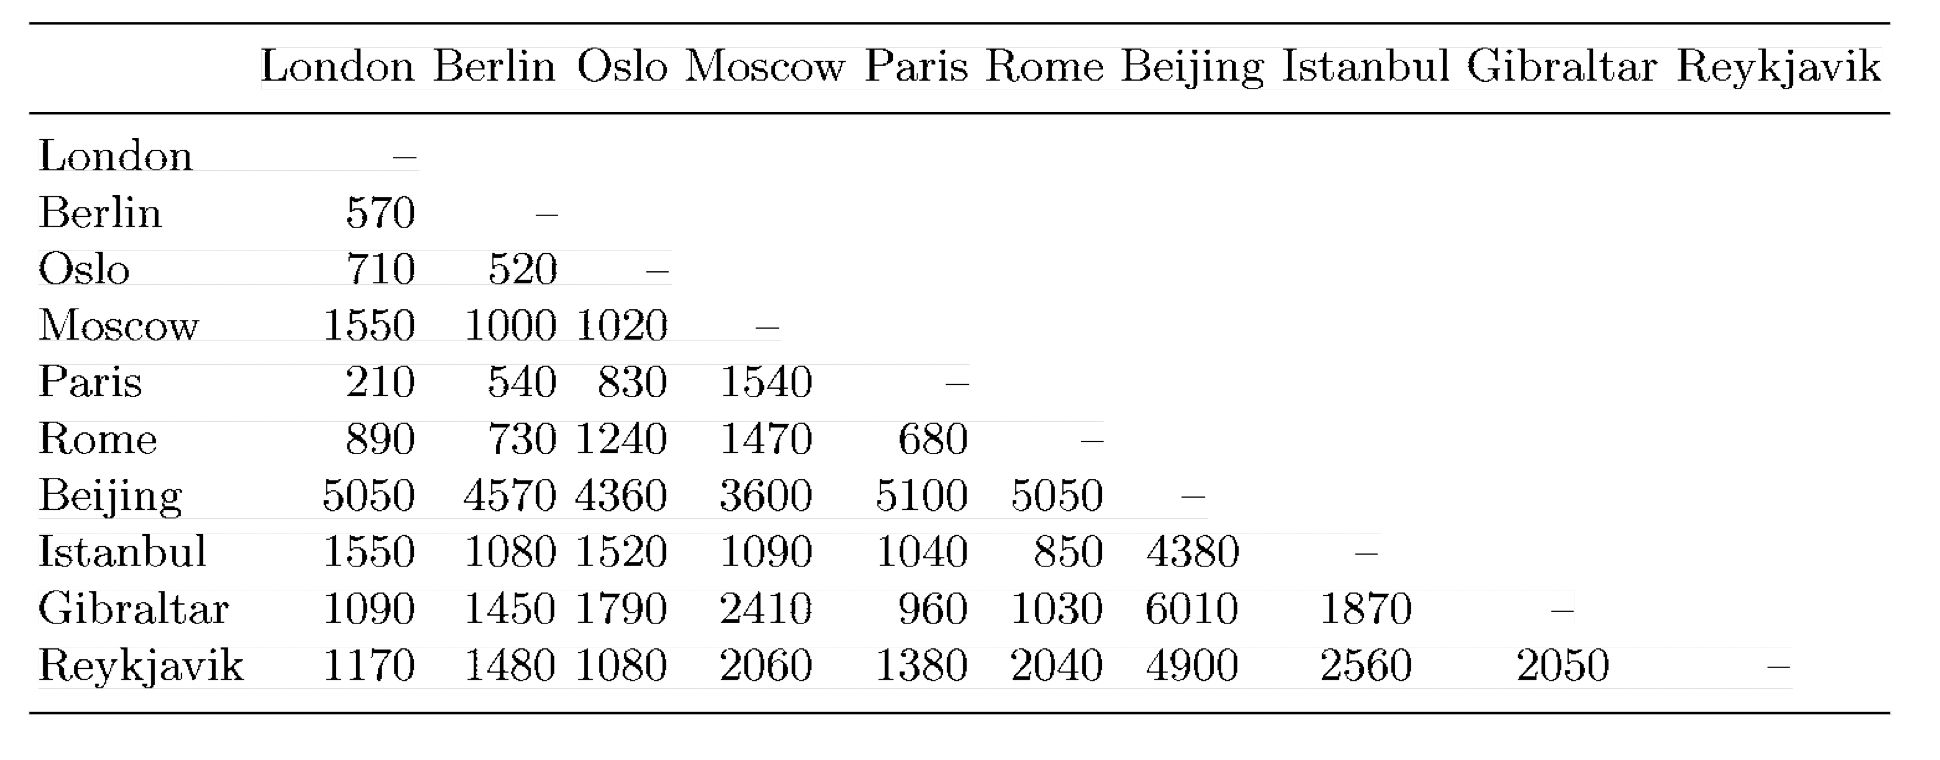

In [34]:
from sklearn.metrics import pairwise_distances
dis_matrix = pairwise_distances(example_df.iloc[:,:-1])
dis_matrix

array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])

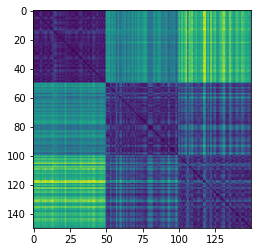

In [48]:
plt.imshow(dis_matrix)    #ยิ่งค่ามาก (ห่างกันมาก) สีจะยิ่งสว่าง ถ้าค่าน้อย (ห่างน้อย) สีจะยิ่งเข้ม

##ทำ MDS

In [36]:
from sklearn.manifold import MDS

In [37]:
mds = MDS(n_components=2)

In [38]:
new_mds = mds.fit_transform(example_df.iloc[:,:-1])

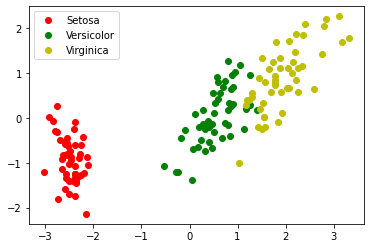

In [39]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa')  #plot กราฟดูข้อมูลระยะห่างในแต่ละจุด (ผลลัพธ์บางคนจะแตกต่างกันไป)
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor')
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label='Virginica')
plt.legend()

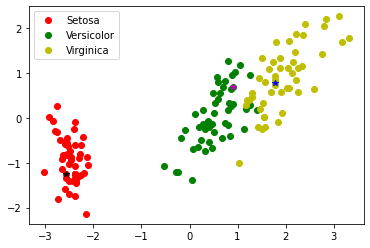

In [40]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa')
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor')
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label='Virginica')
plt.plot(new_mds[6,0],new_mds[6,1],'*k')       #ข้อมูลตัวที่ 6 กำหนัดให้ดาวเป็นสีม่วง
plt.plot(new_mds[56,0],new_mds[56,1],'*m')  #ข้อมูลตัวที่ 56 กำหนดให้ดาวเป็นสีน้ำเงิน
plt.plot(new_mds[116,0],new_mds[116,1],'*b')  #ข้อมูลตัวที่ 116 กำหนดให้ดาวเป็นสีดำ
plt.legend()         #จากการ plot กราฟนี้จะทำให้เราทราบว่าข้อมูลตัวใดสีใกล้กัน ด้วยการทำรูปดาวให้ plot แทนจำนวนข้อมูลแต่ละสี โดยกำหนดให้สีต่างกัน

###การใช้ Pre-computed Distance Matrix

In [41]:
dis_matrix = pairwise_distances(example_df.iloc[:,:-1],metric = 'cityblock') ##‘cityblock’

In [42]:
mds2 = MDS(n_components=2,dissimilarity='precomputed')

In [43]:
new_mds2 = mds2.fit_transform(dis_matrix)

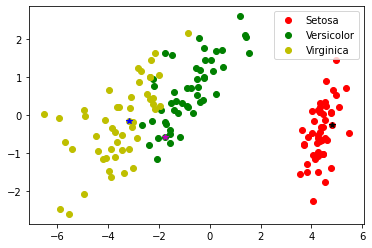

In [44]:
plt.plot(new_mds2[:50,0],new_mds2[:50,1],'or',label='Setosa')
plt.plot(new_mds2[50:100,0],new_mds2[50:100,1],'og',label='Versicolor')
plt.plot(new_mds2[100:,0],new_mds2[100:,1],'oy',label='Virginica')
plt.plot(new_mds2[6,0],new_mds2[6,1],'*k')
plt.plot(new_mds2[56,0],new_mds2[56,1],'*m')
plt.plot(new_mds2[116,0],new_mds2[116,1],'*b')
plt.legend()

###Example 2

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  #กราฟที่สวยงามมากกว่า matplotlib
import numpy as np

In [51]:
def make_hello(N=1000, rseed=42): # โดยที่ N คือจำนวนจุดที่ plot ลงกราฟ
    # Make a plot with "HELLO" text; save as PNG # จะพล็อตจุดให้เป็น HELLO
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])] # return เพื่อนำจุดไปใช้ต่อ

In [52]:
X = make_hello(1000) # 1000 คือจำนวนจุด

In [53]:
X.shape

(1000, 2)

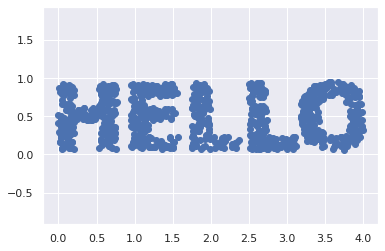

In [54]:
plt.scatter(X[:,0],X[:,1]) # plot จุดแต่ไม่ใส่สี
plt.axis('equal'); # จัดจุดให้สวยงาม

In [55]:
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))

In [57]:
colorize

{'c': array([4.65390215e-05, 5.38772018e-04, 2.61356305e-03, 5.41450286e-03,
        1.74530786e-02, 2.02463354e-02, 2.20884685e-02, 2.55434869e-02,
        2.75118489e-02, 2.78085221e-02, 3.32797689e-02, 3.61538763e-02,
        3.73264793e-02, 3.96952845e-02, 4.11379837e-02, 4.32443345e-02,
        4.52101464e-02, 4.54145791e-02, 4.64821596e-02, 4.68264429e-02,
        4.84830986e-02, 4.96161451e-02, 5.20076940e-02, 5.23778264e-02,
        5.47296590e-02, 5.75739545e-02, 5.87735546e-02, 6.18264661e-02,
        7.02094535e-02, 7.24407353e-02, 7.35627062e-02, 7.64643777e-02,
        7.65794720e-02, 7.67691073e-02, 7.88421510e-02, 8.02847911e-02,
        8.37364713e-02, 8.72935871e-02, 8.84942061e-02, 8.97035566e-02,
        9.45543442e-02, 9.48310146e-02, 9.67670556e-02, 9.98866485e-02,
        1.01545423e-01, 1.01676507e-01, 1.02568263e-01, 1.02758579e-01,
        1.03247628e-01, 1.06045242e-01, 1.08383970e-01, 1.14609710e-01,
        1.21854745e-01, 1.23823164e-01, 1.24596371e-01, 1.2

In [58]:
colorize['c'].shape     #cคือค่าในแนวแกน X

(1000,)

In [59]:
colorize['cmap']

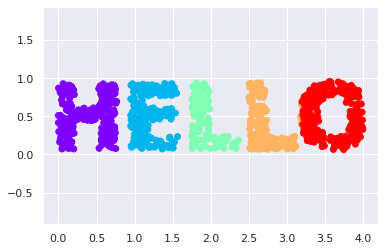

In [60]:
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');   #plot แบบใส่สี

In [61]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)

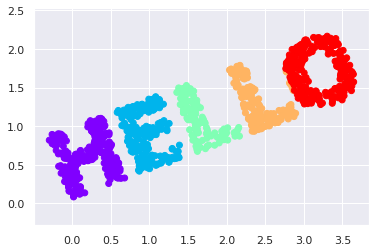

In [62]:
X2 = rotate(X, 20) # หมุนจุดไป 20 องศา
plt.scatter(X2[:, 0], X2[:, 1], **colorize) # เมื่อหมุนแล้วสีต้องตามเดิม
plt.axis('equal'); # เวลา plot กราฟ ใส่ ; เพื่อไม่ให้โชว์ตัวอื่นนอกจากกราฟ

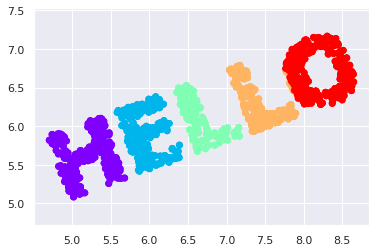

In [63]:
X2 = rotate(X, 20) + 5 #  +5 คือเลื่อนไปแนวแกน X 5 หน่วย และแกน Y 5 หน่วย
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');X2 = rotate(X, 20) + 5 #  +5 คือเลื่อนไปแนวแกน X 5 หน่วย และแกน Y 5 หน่วย
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

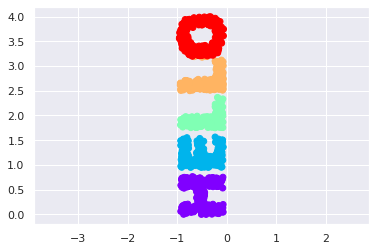

In [64]:
X2 = rotate(X, 90)  #หมุนไป 90 องศา
plt.scatter(X2[:, 0], X2[:, 1], **colorize) #ใส่สี
plt.axis('equal');

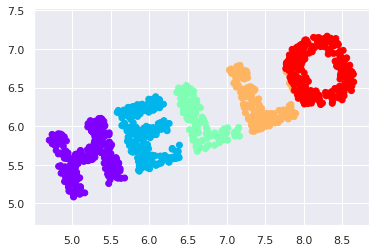

In [65]:
X2 = rotate(X, 20) + 5 
plt.scatter(X2[:, 0], X2[:, 1], **colorize) 
plt.axis('equal');

###ระยะห่างของจุดแต่ละจุด

In [66]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

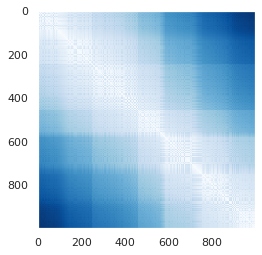

In [67]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest') # ถ้าไม่ใส่แถบสีก็จะไม่รู้ว่าสีขาวบอกอะไร สีเข้มบอกอะไร
#plt.colorbar();  เพิ่ม scale   บอกความเข้มสี
# จุดที่ 1 และจุดที่ 1000 ระยะห่างกันมากที่สุดสีเลยเข้มที่สุด แถวบนสุด
# จุดที่ 1 และจุดที่ 1000 ระยะห่างกันมากที่สุดสีเลยเข้มที่สุด แถวล่างสุด เมทริกซ์สมมาตรกัน ค่าเดียวกัน 
# ถ้าห่างกันนิดเดียวสีจะสว่าง ๆ

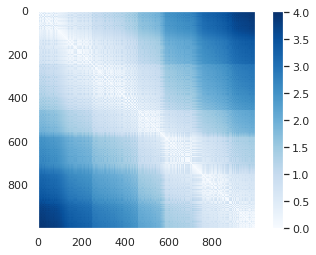

In [68]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar(); # เหมือนกันกับข้างบน แต่เพิ่มแถบสีด้านข้าง สีขาวขจุดห่างกัน  0 สีน้ำเงินเข้ม จุดห่างกัน 4

In [69]:
D2 = pairwise_distances(X2) # สร้าง Distance matrix ของ X ที่หมุนแล้ว

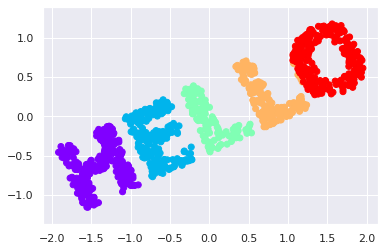

In [70]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize) # เมื่อสร้าง Distance matrix แล้วกราฟจะหาย ในที่นี่สามารถกู้คืนได้ คือใช้ฟังก์ชันนี้
plt.axis('equal');

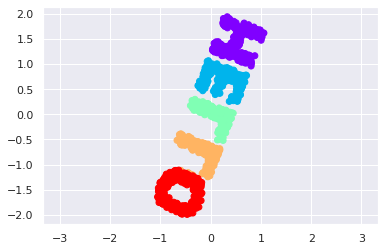

In [71]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed')
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize) # เหมือนข้างบน แต่ให้หมุนแบบ randoms
plt.axis('equal');

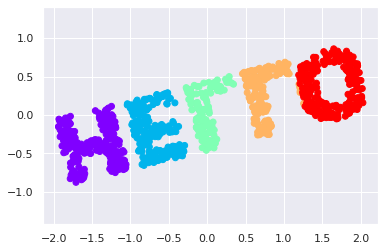

In [72]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed') 
out = model.fit_transform(D) 
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

###Quiz 4

In [73]:
import numpy as np

In [75]:
from sklearn.decomposition import PCA

In [76]:
pca = PCA(n_components=2)

In [77]:
New_pca = pca.fit_transform(X)

In [78]:
New_pca

array([[-1.9337476 , -0.08154573],
       [-1.93360269,  0.01301875],
       [-1.93284845,  0.37256384],
       ...,
       [ 2.05704731, -0.03171414],
       [ 2.05815725, -0.1327384 ],
       [ 2.06207964, -0.15679672]])

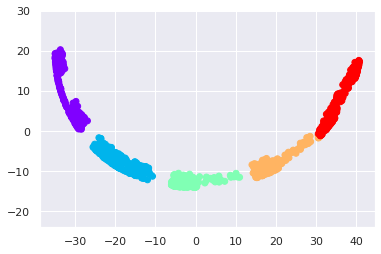

In [79]:
model =PCA(n_components=2)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

ตอบ ที่เห็นรูปตัวอักษรมันโค้งแบบนี้ เนื่องจากจุดที่ plot ออกมาไม่ได้กระจายเป็นตัวอักษรที่ต้องการ



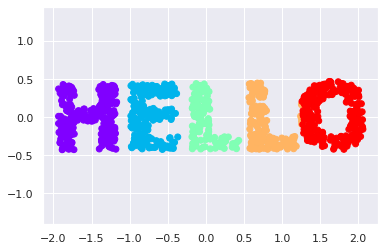

In [80]:
model = PCA(n_components=2)
out = model.fit_transform(X2)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

ตอบ ที่ไม่โค้งงอ เหมือนรูปข้างบน เนื่องจากว่าได้หา PCA ที่มี eigen แกนกระจายและความแปรปวนมากที่สุด เพราะฉะนั้นไม่ว่าจะหมุนไปกี่องศา PCA ก็จะหมุนแกนกลับมาเป็นเหมือนเดิม

